# Redes Neuronales.

Dado el set de datos y el notebook inicial ubicados en: 

https://drive.google.com/file/d/1Tv4bG6AmhpRRzxw7OVzH7qkG6PBJ-DqN/view?usp=sharing

1. Entrenar una red neuronal, utilizando el framework keras, que permita estimar el precio de un vehículo a partir de las mismas features utilizado en el modelo ya calculado.

2. Evaluar la performance del modelo a partir de la relación de las métricas utilizadas y de la función de costo a lo largo de las épocas e iterarlo:

a) Aumentar la complejidad (número de neuronas, capas).
b) Testear al menos 3 optimizadores.
c) Evaluar utilizando los datos escalados/sin escalar.
d) Aumentar la cantidad de épocas de entrenamiento.
e) Incorporar early stopping a la función de entrenamiento.

3. Obtener conclusiones tanto sobre la mejor configuración para el modelo en cuestión, como en su comparación con el modelo ya entrenado en el notebook como baseline.

La entrega consistirá en subír el notebook, con todo lo mencionado anteriormente, dentro del mismo.

# Descripción del dataset

Craigslist es uno de los vendedores más grandes de autos usados.

* id : Unique Id of the car
* url : Listing Url of the car
* region : Craigslist Region
* region_url : Region Url
* price : Price of the car
* year : Year of Sale
* manufacturer : Manufacturer of the car
* model : Model of the car
* condition : Condition the car is in
* cylinders : Type of cylinder the car contains
* fuel : Fuel Type of the car
* odometer : No. of Miles the car traveled
* title_status : Status of the vehicle
* transmission : Transmission Type
* vin : Vehicle Identification Number
* drive : Drive Type
* size : Size of the car
* type : Type of the car
* paint_color : Color of the car
* image_url : Url of the image of the car
* description : Description mentioned by the owner
* county : County it belongs to
* state : State where it is listed
* lat : Latitude of Listing
* long : Longitude of Listing

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
from sklearn import preprocessing
import pandas as pd

# Carga dataset

In [2]:
df=pd.read_csv("./vehicles.csv")
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


tamaño dataset original

In [3]:
df.shape

(426880, 26)

info sobre el dataset (columna, cantidad de no nulos, tipo de dato)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

Veamos como se distribuyen los vehículos (en cantidad) por estado.

In [5]:
df_states = df.groupby(by=["state"])
from ipyleaflet import Map, basemaps, Marker, CircleMarker
center=[df.lat.mean(), df.long.mean()]
m = Map(basemap=basemaps.OpenStreetMap.Mapnik, center=center, zoom=4)
for k in range(df.state.nunique()):   
    marker = Marker()
    marker.location = location=[df_states.lat.mean()[k], df_states.long.mean()[k]]
    marker.draggable = False
    marker.title = 'state: ' + list(df_states.groups.keys())[k] + '\n' + '#cars: ' + str(df_states.state.size()[k])    
    m.add_layer(marker)    
m

Map(center=[38.49394011545027, -94.74859891833916], controls=(ZoomControl(options=['position', 'zoom_in_text',…

# Limpieza de datos

Se puede ver que hay algunas observaciones muy generales para usar. <br>
Se eliminan: 
* **id, url, region_url, image_url**: son completamente irrelevantes para la predicción de precio.
* **VIN**: el *Vehicle Identification Number*. Al igual que los anteriores, parece irrelevante para la predicción del precio.
* **posting_date**: fecha de publicación; ídem anteriores.
* **description**: Es posible que se pueda utilizar mediante el procesamiento del lenguaje natural, pero está más allá del alcance de este módulo y no se tendrá en cuenta. 
* **region, lat, long, county**: Nos deshacemos de estos ya que podríamos decir que tienen información similar a  state.

In [6]:
df= df.drop(columns=['id',
                     'url', 
                     'region_url', 
                     'VIN', 
                     'image_url', 
                     'description', 
                     'lat', 
                     'long',
                     'county',
                     'region', 
                     'posting_date'], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         426880 non-null  int64  
 1   year          425675 non-null  float64
 2   manufacturer  409234 non-null  object 
 3   model         421603 non-null  object 
 4   condition     252776 non-null  object 
 5   cylinders     249202 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  drive         296313 non-null  object 
 11  size          120519 non-null  object 
 12  type          334022 non-null  object 
 13  paint_color   296677 non-null  object 
 14  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(12)
memory usage: 48.9+ MB


Sólo nos quedan 3 columnas numéricas: 
* precio (que es nuestro target), 
* año y,
* cuentakilómetros. 

Veamos un describe de las variables numéricas.

In [8]:
df.describe()

,price,year,odometer
count,4.268800e+05,425675.000000,4.224800e+05
mean,7.519903e+04,2011.235191,9.804333e+04
std,1.218228e+07,9.452120,2.138815e+05
min,0.000000e+00,1900.000000,0.000000e+00
25%,5.900000e+03,2008.000000,3.770400e+04
50%,1.395000e+04,2013.000000,8.554800e+04
75%,2.648575e+04,2017.000000,1.335425e+05
max,3.736929e+09,2022.000000,1.000000e+07


# Manejo de outliers

Veamos si hay outliers en el target (price). <br>
En particular, determinaremos el percentil 10 (precio por debbajo el cual se encuentran el 10 por ciento de las observaciones) y el percentil 90 (precio por debajo del cual se encuentran el 90% de las observaciones).

In [9]:
percentile10, percentile90= np.percentile (df["price"],[10,90])
print(f'Percentile 10-90: (${percentile10:.2f} - ${percentile90:.2f})')
df.shape

Percentile 10-90: ($500.00 - $37590.00)


(426880, 15)

In [10]:
df = df[(df.price < percentile90) & (df.price >= percentile10 )]
df.shape

(341976, 15)

Exploremos la columna del cuentakilómetros. En primer lugar veamos si existen registros Nan y 0.0

In [11]:
print(f'Odometer Nans: {df["odometer"].isna().sum()}')

Odometer Nans: 1889


In [12]:
print(f'Size before odometer nan clean: {df["odometer"].shape}')
df.dropna(subset=['odometer'], inplace=True)
print(f'Size after odometer nan clean: {df["odometer"].shape}')

Size before odometer nan clean: (341976,)
Size after odometer nan clean: (340087,)


Veamos las caracteristicas de los vehículos que tienen el cuentakilómetros en 0. <br>
A priori, tenderíamos a pensar que son 0km y esto no necesariamente tiene que ver con el año. También podría indicar que se le hizo el motor y se le reseteó el cuentakilómetros.

Text(0, 0.5, 'price [dolars]')

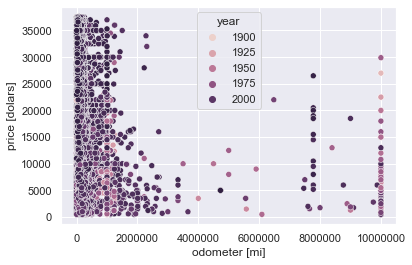

In [13]:
ax = sns.scatterplot(x="odometer", 
                     y="price", 
                     hue='year',
                     data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_xlabel('odometer [mi]')
ax.set_ylabel('price [dolars]')

## outliers de precio y de cuentakilómetros

In [14]:
def treat_outliers(dataframe, col, **kwargs):
    """
    Treat outliers considering interquartile range.
    """     
    # Get keyword arguments
    column_action = kwargs.pop('column_action', 'remove')

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1
    outlier_threshold = q3 + (iqr *1.5)
    if column_action == 'remove':
        dataframe = dataframe[dataframe[col] < outlier_threshold]
    
    return dataframe

In [15]:
print(f'Size before odometer outlier treatment: {df["odometer"].shape}')
df = treat_outliers(df, "odometer")
print(f'Size after odometer outlier treatment: {df["odometer"].shape}')

Size before odometer outlier treatment: (340087,)
Size after odometer outlier treatment: (336740,)


In [16]:
print(f'Size before price outlier treatment: {df["price"].shape}')
df = treat_outliers(df, "price")
print(f'Size after price outlier treatment: {df["price"].shape}')

Size before price outlier treatment: (336740,)
Size after price outlier treatment: (336740,)


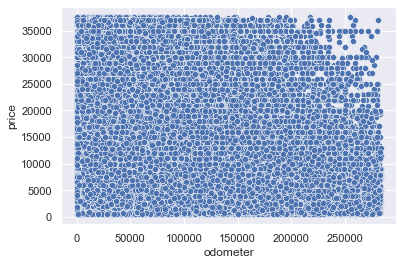

In [17]:
ax = sns.scatterplot(x="odometer", y="price", data=df)
ax.get_xaxis().get_major_formatter().set_scientific(False)

In [18]:
print(f'Cars with nan year: {df["year"].isna().sum()}')
df.dropna(subset=['year'], inplace=True)
print(f'Cars with nan year: {df["year"].isna().sum()}')

Cars with nan year: 565
Cars with nan year: 0


In [19]:
df.year.describe()

count    336175.000000
mean       2010.448745
std           9.397421
min        1900.000000
25%        2007.000000
50%        2013.000000
75%        2016.000000
max        2022.000000
Name: year, dtype: float64

(1895.0, 2028.1)

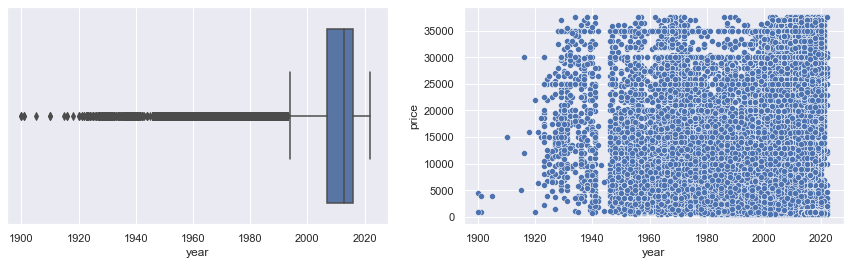

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot(x="year",
            data=df,
            ax=ax[0])

sns.scatterplot(x="year",
                y="price",
                data=df,
                ax=ax[1])

ax[0].set_xlim(left=1895)
ax[1].set_xlim(left=1895)

Se puede apreciar que, en proporción, existe una baja cantidad de vehículos fabricados antes de 1940. <br>
Nos quedamos con los autos entre 1940 y 2020.

In [21]:
print(f'Cars without aging treatment: {df["year"].shape}')
df = df[(df.year > 1940)]
print(f'Cars newers than 1940: {df["year"].shape}')

Cars without aging treatment: (336175,)
Cars newers than 1940: (335576,)


(1895.0, 2026.05)

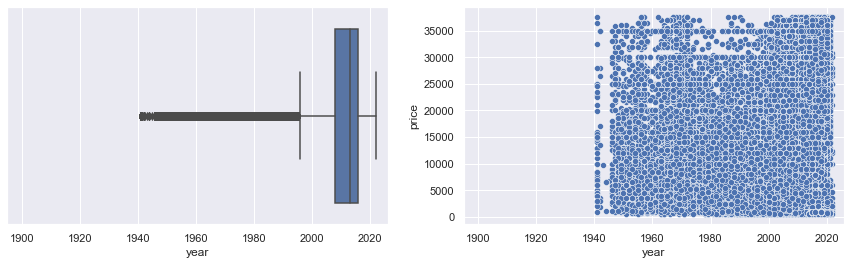

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.boxplot(x="year",
            data=df,
            ax=ax[0])

sns.scatterplot(x="year",
                y="price",
                data=df,
                ax=ax[1])

ax[0].set_xlim(left=1895)
ax[1].set_xlim(left=1895)

# Valores Nulos
Veamos la cantidad (y porcentaje respecto del total) de valores nulos por columna que siguen quedando.

In [23]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values, columns=['null'])
total = len(df)
null_values['percent']=null_values['null']/total
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23575100,70.253
cylinders,13499400,40.228
condition,12234400,36.458
drive,10309400,30.722
paint_color,9712700,28.943
type,7341600,21.878
manufacturer,1171000,3.490
title_status,593700,1.769
model,352400,1.050
fuel,196100,0.584


## Imputación de Nan en columna "condición"
Se imputan dependiendo la categoría. <br>
Se calcula el kilometraje promedio por subcategoría dentro de condición. Luego, los valores faltantes se imputan considerando la media calculada por subcategoría. <br>
Además, los autos nan cuyo año sea:
- mayor a 2019 se imputan como "new" y,
- los que se encuentran entre 2017-2019 como "like-new". 

La idea es que al final de esta imputación, no existan valores faltantes dentro de la categoría condición.

In [24]:
df.condition.value_counts()

good         103702
excellent     85103
like new      17097
fair           6129
new             689
salvage         512
Name: condition, dtype: int64

In [25]:
excellent_odo_mean = df[df['condition'] == 'excellent'].odometer.mean()
good_odo_mean = df[df['condition'] == 'good'].odometer.mean()
like_new_odo_mean = df[df['condition'] == 'like new'].odometer.mean()
salvage_odo_mean = df[df['condition'] == 'salvage'].odometer.mean()
fair_odo_mean = df[df['condition'] == 'fair'].odometer.mean()

print(f'Like new average odometer: {like_new_odo_mean:.1f} [mi]')
print(f'Excellent average odometer: {excellent_odo_mean:.1f} [mi]')
print(f'Good average odometer: {good_odo_mean:.1f} [mi]')
print(f'Fair average odometer:  {fair_odo_mean:.1f} [mi]')
print(f'Salvage average odometer: {salvage_odo_mean:.1f} [mi]')

Like new average odometer: 86754.7 [mi]
Excellent average odometer: 108670.5 [mi]
Good average odometer: 81336.0 [mi]
Fair average odometer:  154855.9 [mi]
Salvage average odometer: 133207.2 [mi]


<AxesSubplot:xlabel='condition', ylabel='odometer'>

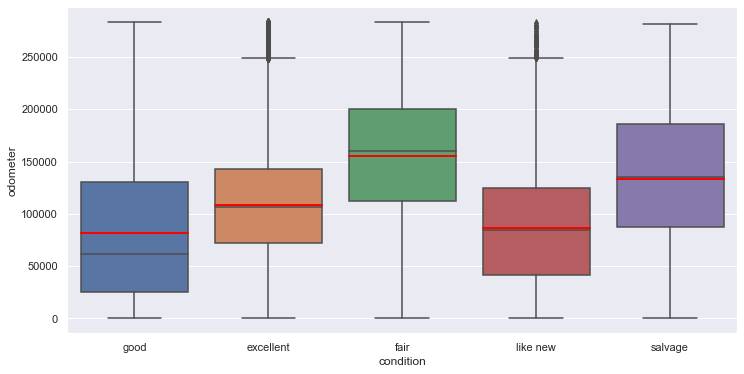

In [26]:
plt.figure(figsize=(12,6))
#sns.boxplot(x="condition",
#            y="odometer",
#            data=df[ ((df['condition']!= 'new') & (df['condition']!='like new'))])


meanprops = {'linewidth':2,
             'linestyle': 'solid',
             'color':'red'}

sns.boxplot(x="condition", 
            y="odometer", 
            data=df[ ((df['condition']!= 'new'))],
            showmeans=True,
            meanline=True,
            meanprops=meanprops)

In [27]:
# Imputación de nuevos
df.loc[df.year>=2019, 'condition'] = df.loc[df.year>=2019, 'condition'].fillna('new')

# Imputación de casi nuevos. De la media de "like new""para abajo, los Nan se imputan como "like new
df.loc[df['odometer'] <= like_new_odo_mean, 'condition'] = df.loc[df['odometer'] <= like_new_odo_mean, 'condition'].fillna('like new')

# Lo que está de la media de "good" para arriba y la media de "excellent" para bajo, lo imputamos como "excellent".
df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= excellent_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
                                                                       (df['odometer'] <= excellent_odo_mean)), 'condition'].fillna('excellent')
# Lo que está de la media de "like new" para arriba y la media de "good" para bajo, lo imputamos como "good".
df.loc[((df['odometer'] > like_new_odo_mean) & 
       (df['odometer'] <= good_odo_mean)), 'condition'] = df.loc[((df['odometer'] > like_new_odo_mean) & 
                                                                  (df['odometer'] <= good_odo_mean)), 'condition'].fillna('good')

# Lo que está de la media de "good" para arriba y de la media de "fair" para abajo, lo imputamos como "salvage"
df.loc[((df['odometer'] > good_odo_mean) & 
       (df['odometer'] <= fair_odo_mean)), 'condition'] = df.loc[((df['odometer'] > good_odo_mean) & 
                                                                  (df['odometer'] <= fair_odo_mean)), 'condition'].fillna('salvage')

# lo que está de la media de "fair" para arriba se imputa como "fair"
df.loc[df['odometer'] >= fair_odo_mean, 'condition'] = df.loc[df['odometer'] >= fair_odo_mean, 'condition'].fillna('fair')


In [28]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')

In [29]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
total = len(df)
null_values['percent'] = null_values['null']/total
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
size,23575100,70.253
cylinders,13499400,40.228
drive,10309400,30.722
paint_color,9712700,28.943
type,7341600,21.878
manufacturer,1171000,3.490
title_status,593700,1.769
model,352400,1.050
fuel,196100,0.584
transmission,127700,0.381


Eliminamos los nulos en las columnas q tienen menos de 5%.

In [30]:
df = df.dropna(subset=['title_status',
                       'fuel',
                       'transmission',
                       'model',
                       'manufacturer'])

Eliminamos size porq tiene demasiados nulos

In [31]:
df=df.drop(["size"],axis=1)

In [32]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
total = len(df)
null_values['percent'] = null_values['null']/total
round(null_values*100,3).sort_values('percent',ascending=False)

,null,percent
cylinders,12557100,40.249
drive,9336000,29.924
paint_color,8626200,27.649
type,6721000,21.542
price,0,0.000
year,0,0.000
manufacturer,0,0.000
model,0,0.000
condition,0,0.000
fuel,0,0.000


Para *paint_color, drive, type y cylinders* los valores nan se imputan utilizando el último valor no nulo.

In [33]:
df['paint_color'] = df['paint_color'].fillna(method='ffill')
df['drive'] = df['drive'].fillna(method='ffill')
df['type'] = df['type'].fillna(method='ffill')
df['cylinders'] = df['cylinders'].fillna(method='ffill')

In [34]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           3
type            0
paint_color     0
state           0
dtype: int64

In [35]:
df = df.dropna(subset=['cylinders','drive'])

In [36]:
df.isnull().sum()

price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
drive           0
type            0
paint_color     0
state           0
dtype: int64

In [37]:
df.shape

(311985, 14)

<AxesSubplot:xlabel='odometer', ylabel='Count'>

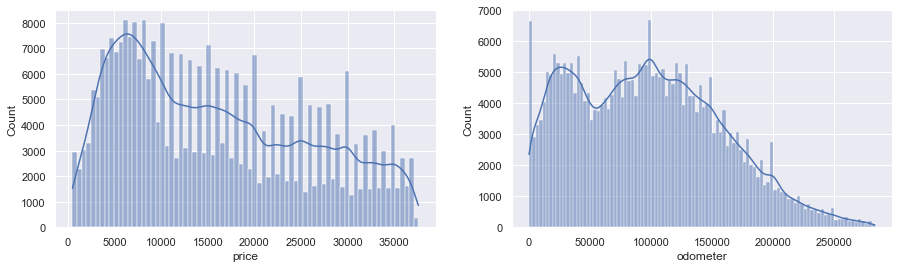

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(15,4))
sns.histplot(x=df.price, kde = True, ax=ax[0])
sns.histplot(x=df.odometer, kde = True , ax=ax[1])

# Exploratory Data Analysis

In [39]:
from scipy import stats

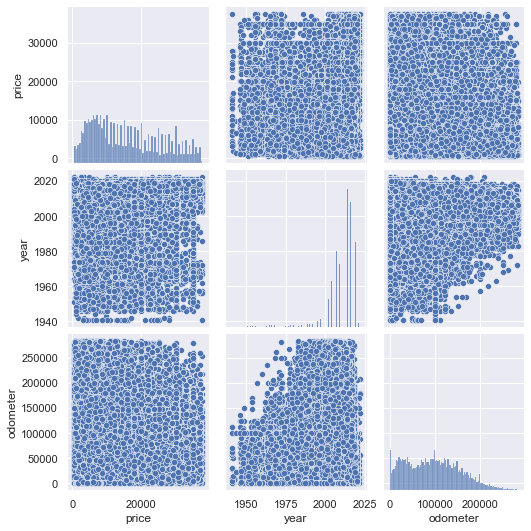

In [40]:
sns.pairplot(df)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311985 entries, 31 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         311985 non-null  int64  
 1   year          311985 non-null  float64
 2   manufacturer  311985 non-null  object 
 3   model         311985 non-null  object 
 4   condition     311985 non-null  object 
 5   cylinders     311985 non-null  object 
 6   fuel          311985 non-null  object 
 7   odometer      311985 non-null  float64
 8   title_status  311985 non-null  object 
 9   transmission  311985 non-null  object 
 10  drive         311985 non-null  object 
 11  type          311985 non-null  object 
 12  paint_color   311985 non-null  object 
 13  state         311985 non-null  object 
dtypes: float64(2), int64(1), object(11)
memory usage: 35.7+ MB


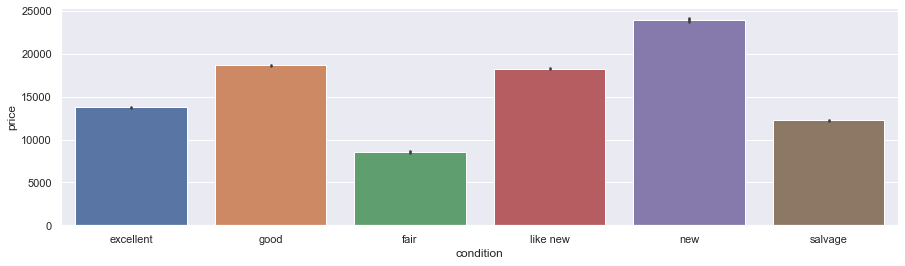

In [42]:
plt.figure(figsize=(15,4))
ax = sns.barplot(x="condition", 
                 y="price", 
                 data=df)

Vehículos nuevos son claramente mas caros

<Figure size 1080x288 with 0 Axes>

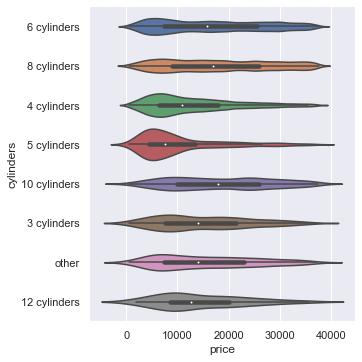

In [43]:
plt.figure(figsize=(15,4))
sns.catplot(y="cylinders", 
            x="price",
            kind = "violin", 
            data=df)

<Figure size 1080x288 with 0 Axes>

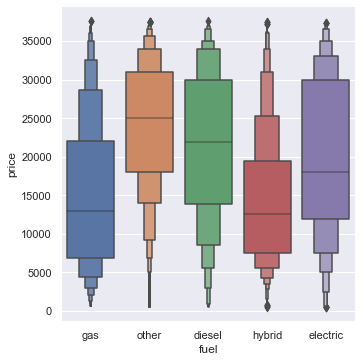

In [44]:
plt.figure(figsize=(15,4))
sns.catplot(x = "fuel", 
            y = "price", 
            kind = "boxen",
            data = df)

Podemos describir donde se encuentran la mayoría de los vehículos por tipo de combustible

Gas=5k-17k

diesel=12k-20k

hybrid=7k-15k

other=11k-20k

electric=10k-18k

Estado del vechículo.

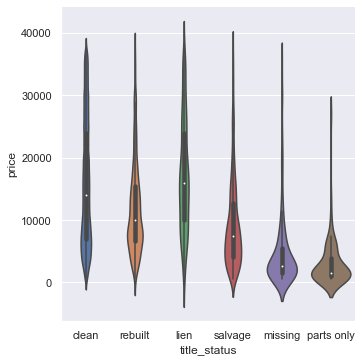

In [45]:
sns.catplot(x="title_status", 
            y="price",
            kind="violin", 
            data=df);

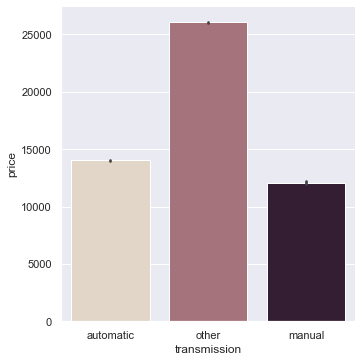

In [46]:
sns.catplot(x="transmission", 
            y="price",
            kind="bar", 
            palette="ch:.25", data=df);

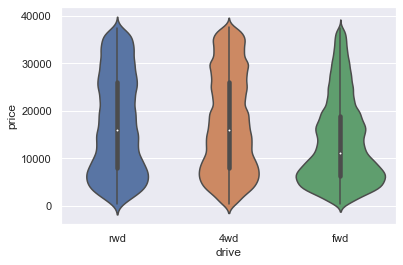

In [47]:
sns.violinplot(x=df.drive, 
               y=df.price);

No hay diferencia entre rwd y 4wd drives.
Fwd es diferente.

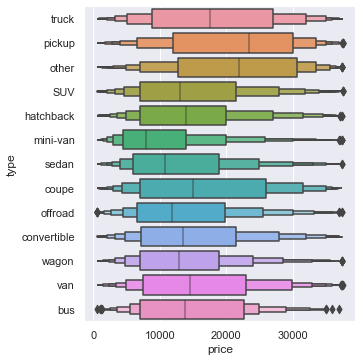

In [48]:
sns.catplot(y="type", 
            x="price",
            kind="boxen", 
            data=df);

El tipo de vehículo influye notoriamente en el precio.

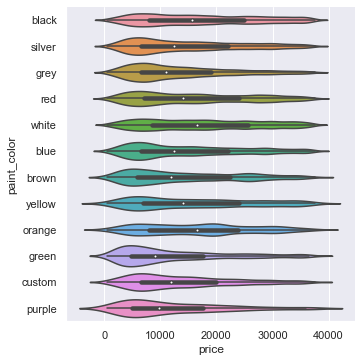

In [49]:
sns.catplot(y="paint_color", 
            x="price",
            kind="violin", 
            data=df);

El color del vehículo influye, en algunos casos, en el precio.

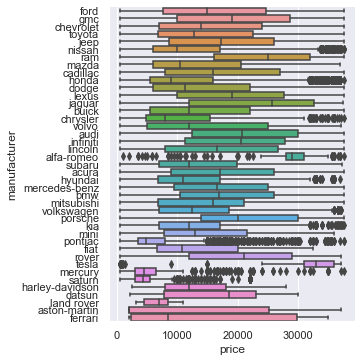

In [50]:
sns.catplot(y="manufacturer", 
            x="price",
            kind="box", 
            data=df);

Gráficamente se observa que el fabricante influye en la media de precios.

Los fabricantes de los autos más caros:

In [51]:
expensive = df["price"]>30000
tmp = df[expensive]
df_expensive = tmp["manufacturer"].value_counts(normalize=True)[:5]
df_expensive

ford         0.186669
chevrolet    0.134872
ram          0.087527
toyota       0.076148
gmc          0.066979
Name: manufacturer, dtype: float64

Los fabricantes de los autos más baratos:

In [52]:
cheap = df["price"]<5000
tmp = df[cheap]
df_cheap = tmp["manufacturer"].value_counts(normalize=True)[:5]
df_cheap

ford         0.152237
chevrolet    0.130624
toyota       0.089333
honda        0.088753
nissan       0.062194
Name: manufacturer, dtype: float64

Ford es el fabricante principal de autos de todas las gamas.

In [53]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [54]:
print("#manufacturer: ", df.manufacturer.nunique())
print("#models: ", df.model.nunique())
print("#conditions: ", df.condition.nunique())
print("#cylinders: ", df.cylinders.nunique())
print("#fuel type: ", df.fuel.nunique())
print("#status: ", df.title_status.nunique())
print("#transmission: ", df.transmission.nunique())
print("#drive: ", df.drive.nunique())
print("#types: ", df.type.nunique())
print("#colors: ", df.paint_color.nunique())
print("#states: ", df.state.nunique())

#manufacturer:  41
#models:  18121
#conditions:  6
#cylinders:  8
#fuel type:  5
#status:  6
#transmission:  3
#drive:  3
#types:  13
#colors:  12
#states:  51


Hacer un get_dummies para los modelos será costoso computacionalmente, veamos de tratar de explotar las demás columnas.

#  Label Processing


In [55]:
df.columns

Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'type',
       'paint_color', 'state'],
      dtype='object')

In [56]:
df = pd.get_dummies(df, columns=["condition",
                                 "manufacturer", 
                                 "drive", 
                                 "type", 
                                 "fuel", 
                                 "transmission",
                                 "title_status",
                                 "paint_color",
                                 "state",
                                 "cylinders"])

In [57]:
df.shape

(311985, 152)

# Escalado 

In [58]:
df.head(5)

,price,year,model,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,...,state_wv,state_wy,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
31,15000,2013.0,f-150 xlt,128000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,27990,2012.0,sierra 2500 hd extended cab,68696.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,34590,2016.0,silverado 1500 double,29499.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,35000,2019.0,tacoma,43000.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35,29990,2016.0,colorado extended cab,17302.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [59]:
vehicles = df.copy()
# Drop modelo, cilindros, estados y color
#vehicles.drop(columns=["model", 
#                       "cylinders",
#                       "state", 
#                       "paint_color"], 
#              axis=1, 
#              inplace=True)

# Drop modelo, cilindros
#vehicles.drop(columns=["model", 
#                       "cylinders"], 
#              axis=1, 
#              inplace=True)

# Drop únicamente modelos
vehicles.drop(columns=["model"], 
              axis=1, 
              inplace=True)

vehicles

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_acura,...,state_wv,state_wy,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
31,15000,2013.0,128000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32,27990,2012.0,68696.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33,34590,2016.0,29499.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,35000,2019.0,43000.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
35,29990,2016.0,17302.0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,32226.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426876,30590,2020.0,12029.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426877,34990,2020.0,4174.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
426878,28990,2018.0,30112.0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [60]:
features = vehicles.select_dtypes(include= ['int64', 'uint8', 'float64']).columns

In [61]:
from sklearn.preprocessing import StandardScaler
vehicles.loc[:, features] = StandardScaler().fit_transform(vehicles.loc[:, features])
vehicles

,price,year,odometer,condition_excellent,condition_fair,condition_good,condition_like new,condition_new,condition_salvage,manufacturer_acura,...,state_wv,state_wy,cylinders_10 cylinders,cylinders_12 cylinders,cylinders_3 cylinders,cylinders_4 cylinders,cylinders_5 cylinders,cylinders_6 cylinders,cylinders_8 cylinders,cylinders_other
31,-0.078255,0.254612,0.505855,1.518706,-0.301848,-0.679766,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,-0.037409,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
32,1.224858,0.131809,-0.476166,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,-0.037409,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,-0.819395,1.693049,-0.054532
33,1.886948,0.623022,-1.125234,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,-0.037409,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
34,1.928078,0.991431,-0.901669,1.518706,-0.301848,-0.679766,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,-0.037409,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
35,1.425492,0.623022,-1.327205,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,-0.037409,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,0.783465,0.991431,-1.080077,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,26.731291,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
426876,1.485682,1.114234,-1.414521,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,26.731291,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
426877,1.927075,1.114234,-1.544593,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,26.731291,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532
426878,1.325175,0.868628,-1.115083,-0.658455,-0.301848,1.471093,-0.467115,-0.158758,-0.322703,-0.12179,...,-0.049838,26.731291,-0.066655,-0.018084,-0.046978,-0.690449,-0.083477,1.220413,-0.590650,-0.054532


In [62]:
X = vehicles.iloc[:, 1::]
y = vehicles.iloc[:,0]

# Split Train and Test data


In [63]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(249588, 150) (249588,)
(62397, 150) (62397,)


# Training Model

# Random Forest

In [66]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [67]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [68]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))
print("Score:", regressor.score(X_test,y_test)*100)

Mean Absolute Error: 0.23
Mean Squared Error: 0.16
Root Mean Squared Error: 0.4
Score: 84.10496730150338


# Red Neuronal

In [80]:
import keras 
keras.__version__

'2.6.0'

In [81]:
import numpy as np
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Flatten

## Topología 0

In [82]:
model_0 = Sequential()
model_0.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model_0.add(Dense(1, activation='relu'))
model_0.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [83]:
model_0.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                4832      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [84]:
from tensorflow import keras
keras.utils.plot_model(model_0, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


Configuramos el earlystoping para cortar el entrenamiento una vez que la pérdida comienza a crecer (en otras palabras cuando el accuracy en la validación comienza a decrecer)

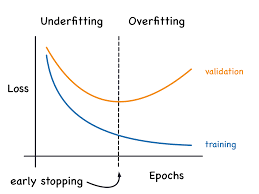

In [85]:
keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=2,
                              verbose=0, 
                              mode='auto')

In [77]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_0, filename='model0',title="First topology evaluated");

In [86]:
n_epochs = 100
batch_size = 10
validation_split = 0.2

In [87]:
history_0=model_0.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 12s 612us/step - loss: 0.6058 - MSE: 0.6058 - val_loss: 0.5781 - val_MSE: 0.5781
Epoch 2/100
19967/19967 [==============================] - 12s 604us/step - loss: 0.5730 - MSE: 0.5730 - val_loss: 0.5739 - val_MSE: 0.5739
Epoch 3/100
19967/19967 [==============================] - 12s 618us/step - loss: 0.5670 - MSE: 0.5670 - val_loss: 0.5736 - val_MSE: 0.5736
Epoch 4/100
19967/19967 [==============================] - 12s 609us/step - loss: 0.5636 - MSE: 0.5636 - val_loss: 0.5669 - val_MSE: 0.5669
Epoch 5/100
19967/19967 [==============================] - 12s 608us/step - loss: 0.5614 - MSE: 0.5614 - val_loss: 0.5666 - val_MSE: 0.5666
Epoch 6/100
19967/19967 [==============================] - 12s 604us/step - loss: 0.5600 - MSE: 0.5600 - val_loss: 0.5656 - val_MSE: 0.5656
Epoch 7/100
19967/19967 [==============================] - 12s 614us/step - loss: 0.5590 - MSE: 0.5590 - val_loss: 0.5654 - val_MSE: 0.5654
Epoch 8/100
19967/19

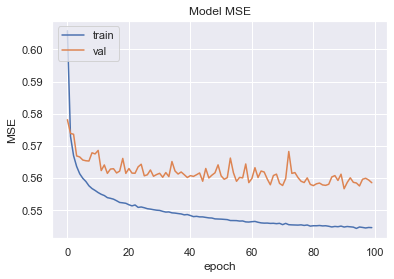

In [88]:
import matplotlib.pyplot as plt
plt.plot(history_0.history['MSE'])
plt.plot(history_0.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

## Topología 1

In [89]:
model_1 = Sequential()
model_1.add(Dense(260, input_dim=X_train.shape[1], activation='linear'))
model_1.add(Dense(130, activation='linear'))
model_1.add(Dense(65, activation='linear'))
model_1.add(Dense(45, activation='linear'))
model_1.add(Dense(25, activation='linear'))
model_1.add(Dense(13, activation='linear'))
model_1.add(Dense(1, activation='linear'))
model_1.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [90]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 260)               39260     
_________________________________________________________________
dense_5 (Dense)              (None, 130)               33930     
_________________________________________________________________
dense_6 (Dense)              (None, 65)                8515      
_________________________________________________________________
dense_7 (Dense)              (None, 45)                2970      
_________________________________________________________________
dense_8 (Dense)              (None, 25)                1150      
_________________________________________________________________
dense_9 (Dense)              (None, 13)                338       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [91]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_1, filename='model1',title="Second topology evaluated");

In [92]:
history_1=model_1.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 18s 853us/step - loss: 0.4255 - MSE: 0.4255 - val_loss: 0.3991 - val_MSE: 0.3991
Epoch 2/100
19967/19967 [==============================] - 17s 849us/step - loss: 0.3944 - MSE: 0.3944 - val_loss: 0.3888 - val_MSE: 0.3888
Epoch 3/100
19967/19967 [==============================] - 17s 866us/step - loss: 0.3892 - MSE: 0.3892 - val_loss: 0.3942 - val_MSE: 0.3942
Epoch 4/100
19967/19967 [==============================] - 17s 867us/step - loss: 0.3871 - MSE: 0.3871 - val_loss: 0.3873 - val_MSE: 0.3873
Epoch 5/100
19967/19967 [==============================] - 17s 858us/step - loss: 0.3859 - MSE: 0.3859 - val_loss: 0.3874 - val_MSE: 0.3874
Epoch 6/100
19967/19967 [==============================] - 16s 806us/step - loss: 0.3854 - MSE: 0.3854 - val_loss: 0.3876 - val_MSE: 0.3876
Epoch 7/100
19967/19967 [==============================] - 16s 807us/step - loss: 0.3855 - MSE: 0.3855 - val_loss: 0.3854 - val_MSE: 0.3854
Epoch 8/100
19967/19

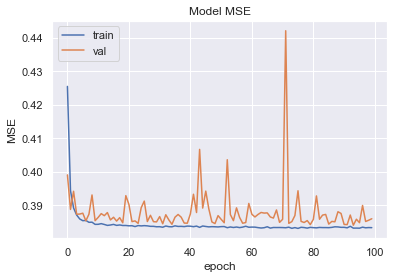

In [93]:
plt.plot(history_1.history["MSE"])
plt.plot(history_1.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

Topología 1 (dropout)

In [111]:
model_1_ = Sequential()
model_1_.add(Dense(260, input_dim=X_train.shape[1], activation='linear'))
model_1_.add(Dense(130, activation='linear'))
model_1_.add(Dropout(0.25))
model_1_.add(Dense(65, activation='linear'))
model_1_.add(Dropout(0.25))
model_1_.add(Dense(45, activation='linear'))
model_1_.add(Dropout(0.25))
model_1_.add(Dense(25, activation='linear'))
model_1_.add(Dropout(0.25))
model_1_.add(Dense(13, activation='linear'))
model_1_.add(Dropout(0.25))
model_1_.add(Dense(1, activation='linear'))
model_1_.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [112]:
model_1_.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 260)               39260     
_________________________________________________________________
dense_42 (Dense)             (None, 130)               33930     
_________________________________________________________________
dropout_20 (Dropout)         (None, 130)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 65)                8515      
_________________________________________________________________
dropout_21 (Dropout)         (None, 65)                0         
_________________________________________________________________
dense_44 (Dense)             (None, 45)                2970      
_________________________________________________________________
dropout_22 (Dropout)         (None, 45)               

In [113]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_1_, filename='model1_drop',title="Second topology evaluated (dropout)");

In [114]:
history_1=model_1_.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 19s 908us/step - loss: 0.5960 - MSE: 0.5960 - val_loss: 0.4397 - val_MSE: 0.4397
Epoch 2/100
19967/19967 [==============================] - 19s 944us/step - loss: 0.4662 - MSE: 0.4662 - val_loss: 0.3974 - val_MSE: 0.3974
Epoch 3/100
19967/19967 [==============================] - 18s 907us/step - loss: 0.4610 - MSE: 0.4610 - val_loss: 0.3952 - val_MSE: 0.3952
Epoch 4/100
19967/19967 [==============================] - 18s 906us/step - loss: 0.4606 - MSE: 0.4606 - val_loss: 0.3920 - val_MSE: 0.3920
Epoch 5/100
19967/19967 [==============================] - 18s 908us/step - loss: 0.4572 - MSE: 0.4572 - val_loss: 0.4973 - val_MSE: 0.4973
Epoch 6/100
19967/19967 [==============================] - 18s 912us/step - loss: 0.4614 - MSE: 0.4614 - val_loss: 0.4077 - val_MSE: 0.4077
Epoch 7/100
19967/19967 [==============================] - 18s 924us/step - loss: 0.4600 - MSE: 0.4600 - val_loss: 0.3944 - val_MSE: 0.3944
Epoch 8/100
19967/19

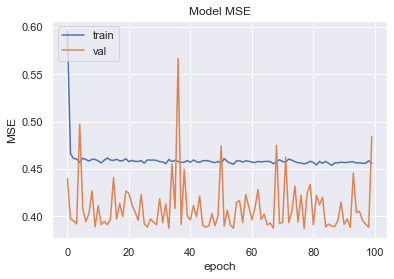

In [115]:
plt.plot(history_1.history["MSE"])
plt.plot(history_1.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

## Topología 2

In [116]:
##Esta arquitectura es la mejor (hasta el momento)
model_2 = Sequential()
model_2.add(Dense(16, input_dim=X_train.shape[1], activation='linear'))
model_2.add(Dense(128, activation='softmax'))
model_2.add(Dense(96, activation='softmax'))
model_2.add(Dense(64, activation='sigmoid'))
model_2.add(Dense(32, activation='sigmoid'))
model_2.add(Dense(16, activation='sigmoid'))
model_2.add(Dense(8, activation='sigmoid'))
model_2.add(Dense(4, activation='sigmoid'))
model_2.add(Dense(2, activation='linear'))
model_2.add(Dense(1, activation='linear'))

model_2.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [117]:
model_2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 16)                2416      
_________________________________________________________________
dense_49 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_50 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_51 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_52 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_53 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_54 (Dense)             (None, 8)                

In [118]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_2, filename='model2',title="Third topology evaluated");

In [119]:
history_2=model_2.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 18s 866us/step - loss: 0.3744 - MSE: 0.3744 - val_loss: 0.2625 - val_MSE: 0.2625
Epoch 2/100
19967/19967 [==============================] - 17s 856us/step - loss: 0.2561 - MSE: 0.2561 - val_loss: 0.2521 - val_MSE: 0.2521
Epoch 3/100
19967/19967 [==============================] - 17s 852us/step - loss: 0.2435 - MSE: 0.2435 - val_loss: 0.2377 - val_MSE: 0.2377
Epoch 4/100
19967/19967 [==============================] - 17s 854us/step - loss: 0.2361 - MSE: 0.2361 - val_loss: 0.2348 - val_MSE: 0.2348
Epoch 5/100
19967/19967 [==============================] - 17s 863us/step - loss: 0.2300 - MSE: 0.2300 - val_loss: 0.2323 - val_MSE: 0.2323
Epoch 6/100
19967/19967 [==============================] - 16s 821us/step - loss: 0.2280 - MSE: 0.2280 - val_loss: 0.2293 - val_MSE: 0.2293
Epoch 7/100
19967/19967 [==============================] - 17s 852us/step - loss: 0.2254 - MSE: 0.2254 - val_loss: 0.2309 - val_MSE: 0.2309
Epoch 8/100
19967/19

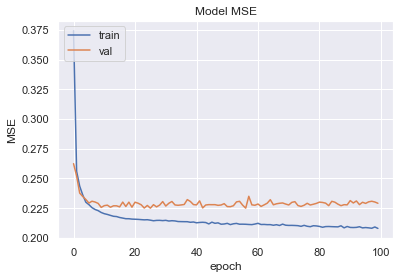

In [125]:
plt.plot(history_2.history["MSE"])
plt.plot(history_2.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

## Topología 2 (dropout)

In [126]:
##Esta arquitectura es la mejor (hasta el momento)
model_2_ = Sequential()
model_2_.add(Dense(16, input_dim=X_train.shape[1], activation='linear'))
model_2_.add(Dense(128, activation='softmax'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(96, activation='softmax'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(64, activation='sigmoid'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(32, activation='sigmoid'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(16, activation='sigmoid'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(8, activation='sigmoid'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(4, activation='sigmoid'))
model_2_.add(Dropout(0.25))
model_2_.add(Dense(2, activation='linear'))
model_2_.add(Dense(1, activation='linear'))

model_2_.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [127]:
model_2_.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_68 (Dense)             (None, 16)                2416      
_________________________________________________________________
dense_69 (Dense)             (None, 128)               2176      
_________________________________________________________________
dropout_32 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_70 (Dense)             (None, 96)                12384     
_________________________________________________________________
dropout_33 (Dropout)         (None, 96)                0         
_________________________________________________________________
dense_71 (Dense)             (None, 64)                6208      
_________________________________________________________________
dropout_34 (Dropout)         (None, 64)              

In [128]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_2_, filename='model2_drp',title="Third topology evaluated (dropout)");

In [129]:
history_2_=model_2_.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 19s 924us/step - loss: 0.8057 - MSE: 0.8057 - val_loss: 0.3706 - val_MSE: 0.3706
Epoch 2/100
19967/19967 [==============================] - 18s 914us/step - loss: 0.4803 - MSE: 0.4803 - val_loss: 0.3297 - val_MSE: 0.3297
Epoch 3/100
19967/19967 [==============================] - 18s 920us/step - loss: 0.4461 - MSE: 0.4461 - val_loss: 0.3096 - val_MSE: 0.3096
Epoch 4/100
19967/19967 [==============================] - 18s 915us/step - loss: 0.4256 - MSE: 0.4256 - val_loss: 0.2961 - val_MSE: 0.2961
Epoch 5/100
19967/19967 [==============================] - 18s 914us/step - loss: 0.4189 - MSE: 0.4189 - val_loss: 0.2898 - val_MSE: 0.2898
Epoch 6/100
19967/19967 [==============================] - 18s 899us/step - loss: 0.4114 - MSE: 0.4114 - val_loss: 0.2881 - val_MSE: 0.2881
Epoch 7/100
19967/19967 [==============================] - 18s 908us/step - loss: 0.4053 - MSE: 0.4053 - val_loss: 0.2835 - val_MSE: 0.2835
Epoch 8/100
19967/19

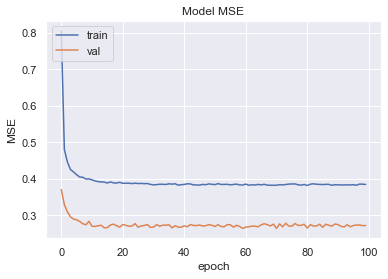

In [130]:
plt.plot(history_2_.history["MSE"])
plt.plot(history_2_.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

## Topología 3
A diferencia del anterior, asigno la misma cantidad de capas que la dimensión del dataset

In [131]:
model_3 = Sequential()
model_3.add(Dense(X_train.shape[1], input_dim=X_train.shape[1], activation='linear'))
model_3.add(Dense(128, activation='softmax'))
model_3.add(Dense(96, activation='softmax'))
model_3.add(Dense(64, activation='sigmoid'))
model_3.add(Dense(32, activation='sigmoid'))
model_3.add(Dense(16, activation='sigmoid'))
model_3.add(Dense(8, activation='sigmoid'))
model_3.add(Dense(4, activation='sigmoid'))
model_3.add(Dense(2, activation='linear'))
model_3.add(Dense(1, activation='linear'))

model_3.compile(loss='MSE',
                optimizer="adam",
                metrics="MSE")

In [132]:
model_3.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_78 (Dense)             (None, 150)               22650     
_________________________________________________________________
dense_79 (Dense)             (None, 128)               19328     
_________________________________________________________________
dense_80 (Dense)             (None, 96)                12384     
_________________________________________________________________
dense_81 (Dense)             (None, 64)                6208      
_________________________________________________________________
dense_82 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_83 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_84 (Dense)             (None, 8)               

In [133]:
from ann_visualizer.visualize import ann_viz;
ann_viz(model_3, filename='model3',title="Fourth topology evaluated");

In [134]:
history_3=model_3.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 21s 997us/step - loss: 0.4344 - MSE: 0.4344 - val_loss: 0.3386 - val_MSE: 0.3386
Epoch 2/100
19967/19967 [==============================] - 20s 1ms/step - loss: 0.3287 - MSE: 0.3287 - val_loss: 0.3181 - val_MSE: 0.3181
Epoch 3/100
19967/19967 [==============================] - 21s 1ms/step - loss: 0.3195 - MSE: 0.3195 - val_loss: 0.3168 - val_MSE: 0.3168
Epoch 4/100
19967/19967 [==============================] - 20s 1ms/step - loss: 0.3137 - MSE: 0.3137 - val_loss: 0.3006 - val_MSE: 0.3006
Epoch 5/100
19967/19967 [==============================] - 19s 976us/step - loss: 0.3013 - MSE: 0.3013 - val_loss: 0.3032 - val_MSE: 0.3032
Epoch 6/100
19967/19967 [==============================] - 21s 1ms/step - loss: 0.2961 - MSE: 0.2961 - val_loss: 0.3004 - val_MSE: 0.3004
Epoch 7/100
19967/19967 [==============================] - 19s 970us/step - loss: 0.2962 - MSE: 0.2962 - val_loss: 0.2939 - val_MSE: 0.2939
Epoch 8/100
19967/19967 [===

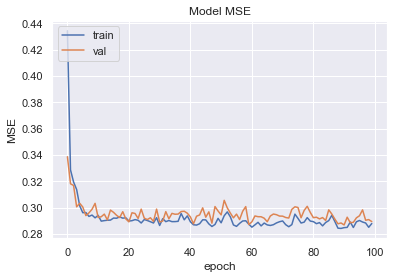

In [135]:
plt.plot(history_3.history["MSE"])
plt.plot(history_3.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()

## Comparación entre topologías

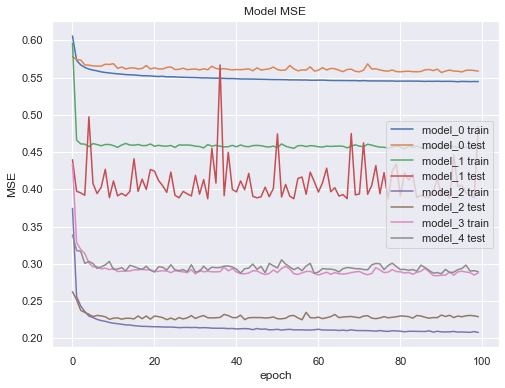

In [136]:
plt.figure(figsize=(8,6))
plt.plot(history_0.history["MSE"], label='model_0 train')
plt.plot(history_0.history["val_MSE"], label='model_0 test')
plt.plot(history_1.history["MSE"], label='model_1 train')
plt.plot(history_1.history["val_MSE"], label='model_1 test')
plt.plot(history_2.history["MSE"], label='model_2 train')
plt.plot(history_2.history["val_MSE"], label='model_2 test')
plt.plot(history_3.history["MSE"], label='model_3 train')
plt.plot(history_3.history["val_MSE"], label='model_4 test')
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Topología 2 con optimizador diferente

Pruebo otro optimizador con la arquitectura que salió mejor de las evaluadas anteriormente.

In [137]:
model_2.compile(loss='MSE',
                optimizer="SGD",
                metrics="MSE")

In [138]:
history_2a=model_2.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 16s 804us/step - loss: 0.1987 - MSE: 0.1987 - val_loss: 0.2250 - val_MSE: 0.2250
Epoch 2/100
19967/19967 [==============================] - 16s 793us/step - loss: 0.1953 - MSE: 0.1953 - val_loss: 0.2237 - val_MSE: 0.2237
Epoch 3/100
19967/19967 [==============================] - 15s 755us/step - loss: 0.1936 - MSE: 0.1936 - val_loss: 0.2233 - val_MSE: 0.2233
Epoch 4/100
19967/19967 [==============================] - 15s 749us/step - loss: 0.1928 - MSE: 0.1928 - val_loss: 0.2239 - val_MSE: 0.2239
Epoch 5/100
19967/19967 [==============================] - 15s 769us/step - loss: 0.1926 - MSE: 0.1926 - val_loss: 0.2222 - val_MSE: 0.2222
Epoch 6/100
19967/19967 [==============================] - 15s 755us/step - loss: 0.1920 - MSE: 0.1920 - val_loss: 0.2247 - val_MSE: 0.2247
Epoch 7/100
19967/19967 [==============================] - 15s 756us/step - loss: 0.1920 - MSE: 0.1920 - val_loss: 0.2212 - val_MSE: 0.2212
Epoch 8/100
19967/19

In [139]:
model_2.compile(loss='MSE',
                optimizer="adagrad",
                metrics="MSE")

In [140]:
history_2b=model_2.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 17s 844us/step - loss: 0.1843 - MSE: 0.1843 - val_loss: 0.2208 - val_MSE: 0.2208
Epoch 2/100
19967/19967 [==============================] - 17s 828us/step - loss: 0.1836 - MSE: 0.1836 - val_loss: 0.2208 - val_MSE: 0.2208
Epoch 3/100
19967/19967 [==============================] - 17s 842us/step - loss: 0.1833 - MSE: 0.1833 - val_loss: 0.2208 - val_MSE: 0.2208
Epoch 4/100
19967/19967 [==============================] - 16s 824us/step - loss: 0.1831 - MSE: 0.1831 - val_loss: 0.2209 - val_MSE: 0.2209
Epoch 5/100
19967/19967 [==============================] - 16s 826us/step - loss: 0.1830 - MSE: 0.1830 - val_loss: 0.2209 - val_MSE: 0.2209
Epoch 6/100
19967/19967 [==============================] - 17s 857us/step - loss: 0.1829 - MSE: 0.1829 - val_loss: 0.2209 - val_MSE: 0.2209
Epoch 7/100
19967/19967 [==============================] - 17s 831us/step - loss: 0.1828 - MSE: 0.1828 - val_loss: 0.2208 - val_MSE: 0.2208
Epoch 8/100
19967/19

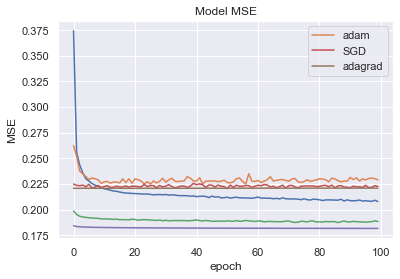

In [141]:
plt.plot(history_2.history["MSE"])
plt.plot(history_2.history["val_MSE"], label='adam')
plt.plot(history_2a.history["MSE"])
plt.plot(history_2a.history["val_MSE"], label='SGD')
plt.plot(history_2b.history["MSE"])
plt.plot(history_2b.history["val_MSE"], label='adagrad')
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend()
plt.show()

## Model 2 con optimizador adagrad y capas dropout

In [142]:
model_2_.compile(loss='MSE',
                optimizer="adagrad",
                metrics="MSE")

In [143]:
history_2b_=model_2_.fit(
    X_train, 
    y_train, 
    validation_split=validation_split,
    batch_size=batch_size,
    epochs=n_epochs
)

Epoch 1/100
19967/19967 [==============================] - 18s 876us/step - loss: 0.3819 - MSE: 0.3819 - val_loss: 0.2718 - val_MSE: 0.2718
Epoch 2/100
19967/19967 [==============================] - 17s 854us/step - loss: 0.3799 - MSE: 0.3799 - val_loss: 0.2710 - val_MSE: 0.2710
Epoch 3/100
19967/19967 [==============================] - 17s 848us/step - loss: 0.3808 - MSE: 0.3808 - val_loss: 0.2706 - val_MSE: 0.2706
Epoch 4/100
19967/19967 [==============================] - 17s 869us/step - loss: 0.3781 - MSE: 0.3781 - val_loss: 0.2701 - val_MSE: 0.2701
Epoch 5/100
19967/19967 [==============================] - 17s 857us/step - loss: 0.3788 - MSE: 0.3788 - val_loss: 0.2699 - val_MSE: 0.2699
Epoch 6/100
19967/19967 [==============================] - 17s 853us/step - loss: 0.3791 - MSE: 0.3791 - val_loss: 0.2694 - val_MSE: 0.2694
Epoch 7/100
19967/19967 [==============================] - 17s 861us/step - loss: 0.3758 - MSE: 0.3758 - val_loss: 0.2693 - val_MSE: 0.2693
Epoch 8/100
19967/19

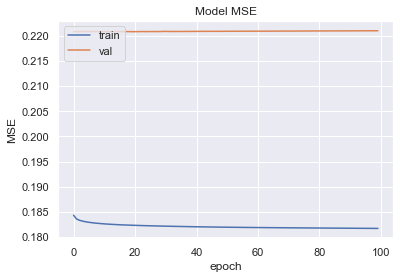

In [144]:
plt.plot(history_2b.history["MSE"])
plt.plot(history_2b.history["val_MSE"])
plt.title("Model MSE")
plt.ylabel("MSE")
plt.xlabel("epoch")
plt.legend(["train", "val"], loc="upper left")
plt.show()